add functions (tanh)

In [1]:
# tanh function
import sys
import os

cwd = os.getcwd()
parent_dir = os.path.abspath(os.path.join(cwd, os.pardir))
sys.path.append(parent_dir)

import numpy as np
from dezero.core import Function

class Tanh(Function):
    def forward(self, x):
        y = np.tanh(x)
        return y

    def backward(self, gy):
        x, = self.inputs
        gx = gy * (1- y*y)
        return gx

def tanh(x):
    return Tanh()(x)



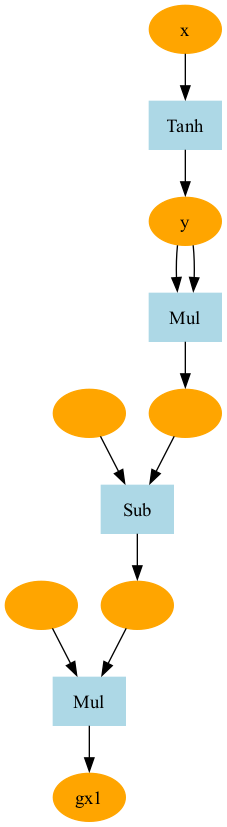

In [5]:
# visualize computational graphs

import numpy as np
from dezero import Variable
from dezero.utils import plot_dot_graph
import dezero.functions as F

x = Variable(np.array(1.0))
y = F.tanh(x)
x.name = 'x'
y.name = 'y'
y.backward(create_graph=True)

iters = 0 # iters+1 order

for i in range(iters):
    gx = x.grad
    x.cleargrad()
    gx.backward(create_graph=True)

gx = x.grad
gx.name = 'gx' + str(iters+1)
plot_dot_graph(gx, verbose=False, to_file='tanh.png')